<a href="https://colab.research.google.com/github/jsan2321/Challenge-Alura-Store-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [ ]:
import pandas as pd

# URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [ ]:
# Calcular ingresos totales
ingreso_total_tienda1 = tienda1['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Facturaci√≥n total Tienda 1: ${ingreso_total_tienda1:.2f}")
print(f"Facturaci√≥n total Tienda 2: ${ingreso_total_tienda2:.2f}")
print(f"Facturaci√≥n total Tienda 3: ${ingreso_total_tienda3:.2f}")
print(f"Facturaci√≥n total Tienda 4: ${ingreso_total_tienda4:.2f}")

# Determinar la tienda con menor facturaci√≥n
facturacion = {
    'Tienda 1': ingreso_total_tienda1,
    'Tienda 2': ingreso_total_tienda2,
    'Tienda 3': ingreso_total_tienda3,
    'Tienda 4': ingreso_total_tienda4
}

tienda_menos_rentable = min(facturacion, key=facturacion.get)
print(f"\nLa tienda menos rentable es: {tienda_menos_rentable} con ${facturacion[tienda_menos_rentable]:.2f}")

Facturaci√≥n total Tienda 1: $1150880400.00
Facturaci√≥n total Tienda 2: $1116343500.00
Facturaci√≥n total Tienda 3: $1098019600.00
Facturaci√≥n total Tienda 4: $1038375700.00

La tienda menos rentable es: Tienda 4 con $1038375700.00


# 2. Ventas por categor√≠a

In [ ]:
# Funci√≥n para calcular ventas por categor√≠a
def ventas_por_categoria(df, nombre_tienda):
    grupo = df.groupby('Categor√≠a del Producto').size().reset_index(name='Cantidad de Ventas')
    grupo = grupo.sort_values(by='Cantidad de Ventas', ascending=False)
    print(f"\n--- {nombre_tienda} ---")
    print(grupo.to_string(index=False))

# Aplicar la funci√≥n a cada tienda
ventas_por_categoria(tienda1, "Tienda 1")
ventas_por_categoria(tienda2, "Tienda 2")
ventas_por_categoria(tienda3, "Tienda 3")
ventas_por_categoria(tienda4, "Tienda 4")


--- Tienda 1 ---
 Categor√≠a del Producto  Cantidad de Ventas
                Muebles                 465
           Electr√≥nicos                 448
               Juguetes                 324
      Electrodom√©sticos                 312
   Deportes y diversi√≥n                 284
 Instrumentos musicales                 182
                 Libros                 173
Art√≠culos para el hogar                 171

--- Tienda 2 ---
 Categor√≠a del Producto  Cantidad de Ventas
                Muebles                 442
           Electr√≥nicos                 422
               Juguetes                 313
      Electrodom√©sticos                 305
   Deportes y diversi√≥n                 275
 Instrumentos musicales                 224
                 Libros                 197
Art√≠culos para el hogar                 181

--- Tienda 3 ---
 Categor√≠a del Producto  Cantidad de Ventas
                Muebles                 499
           Electr√≥nicos                 451
          

# 3. Calificaci√≥n promedio de la tienda


In [ ]:
# Funci√≥n para calcular el promedio de calificaciones
def calificacion_promedio(df, nombre_tienda):
    if 'Calificaci√≥n' in df.columns:
        promedio = df['Calificaci√≥n'].mean()
        print(f"{nombre_tienda}: Calificaci√≥n promedio = {promedio:.2f}")
    else:
        print(f"{nombre_tienda}: No se encontr√≥ la columna 'Calificaci√≥n'.")

# Calcular y mostrar resultados
calificacion_promedio(tienda1, "Tienda 1")
calificacion_promedio(tienda2, "Tienda 2")
calificacion_promedio(tienda3, "Tienda 3")
calificacion_promedio(tienda4, "Tienda 4")

Tienda 1: Calificaci√≥n promedio = 3.98
Tienda 2: Calificaci√≥n promedio = 4.04
Tienda 3: Calificaci√≥n promedio = 4.05
Tienda 4: Calificaci√≥n promedio = 4.00


# 4. Productos m√°s y menos vendidos

In [ ]:
# Funci√≥n para encontrar productos m√°s y menos vendidos
def productos_mas_y_menos_vendidos(df, nombre_tienda):
    if 'Producto' in df.columns:
        # Contar ventas por producto
        ventas_producto = df['Producto'].value_counts().reset_index()
        ventas_producto.columns = ['Producto', 'Cantidad de Ventas']

        # Obtener m√°s y menos vendido
        mas_vendido = ventas_producto.iloc[0]
        menos_vendido = ventas_producto.iloc[-1]

        print(f"\n--- {nombre_tienda} ---")
        print(f"Producto m√°s vendido: {mas_vendido['Producto']} ({mas_vendido['Cantidad de Ventas']} ventas)")
        print(f"Producto menos vendido: {menos_vendido['Producto']} ({menos_vendido['Cantidad de Ventas']} ventas)")
    else:
        print(f"{nombre_tienda}: No se encontr√≥ la columna 'Producto'.")

# Aplicar funci√≥n a cada tienda
productos_mas_y_menos_vendidos(tienda1, "Tienda 1")
productos_mas_y_menos_vendidos(tienda2, "Tienda 2")
productos_mas_y_menos_vendidos(tienda3, "Tienda 3")
productos_mas_y_menos_vendidos(tienda4, "Tienda 4")


--- Tienda 1 ---
Producto m√°s vendido: Microondas (60 ventas)
Producto menos vendido: Celular ABXY (33 ventas)

--- Tienda 2 ---
Producto m√°s vendido: Iniciando en programaci√≥n (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

--- Tienda 3 ---
Producto m√°s vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcci√≥n (35 ventas)

--- Tienda 4 ---
Producto m√°s vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra el√©ctrica (33 ventas)


# 5. Env√≠o promedio por tienda

In [ ]:
# Funci√≥n para calcular el costo promedio de env√≠o
def costo_envio_promedio(df, nombre_tienda):
    if 'Costo de env√≠o' in df.columns:
        promedio = df['Costo de env√≠o'].mean()
        print(f"{nombre_tienda}: Costo promedio de env√≠o = ${promedio:.2f}")
    else:
        print(f"{nombre_tienda}: No se encontr√≥ la columna 'Costo de env√≠o'.")

# Calcular y mostrar resultados
costo_envio_promedio(tienda1, "Tienda 1")
costo_envio_promedio(tienda2, "Tienda 2")
costo_envio_promedio(tienda3, "Tienda 3")
costo_envio_promedio(tienda4, "Tienda 4")

Tienda 1: Costo promedio de env√≠o = $26018.61
Tienda 2: Costo promedio de env√≠o = $25216.24
Tienda 3: Costo promedio de env√≠o = $24805.68
Tienda 4: Costo promedio de env√≠o = $23459.46


# Visualizaci√≥n

In [ ]:
# Calcular m√©tricas b√°sicas
def obtener_metricas(df, nombre_tienda):
    facturacion = df['Precio'].sum()
    calificacion_promedio = df['Calificaci√≥n'].mean() if 'Calificaci√≥n' in df.columns else 0
    costo_envio_promedio = df['Costo de env√≠o'].mean() if 'Costo de env√≠o' in df.columns else 0
    categoria_popular = df['Categor√≠a del Producto'].mode()[0] if 'Categor√≠a del Producto' in df.columns else ''
    return {
        'Tienda': nombre_tienda,
        'Facturaci√≥n': facturacion,
        'Calificaci√≥n Promedio': calificacion_promedio,
        'Costo de Env√≠o Promedio': costo_envio_promedio,
        'Categor√≠a Popular': categoria_popular
    }

# Recopilar datos
metricas = [
    obtener_metricas(tienda1, 'Tienda 1'),
    obtener_metricas(tienda2, 'Tienda 2'),
    obtener_metricas(tienda3, 'Tienda 3'),
    obtener_metricas(tienda4, 'Tienda 4')
]

df_metricas = pd.DataFrame(metricas)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Gr√°fico 1: Facturaci√≥n Total por Tienda (Gr√°fico de Barras)

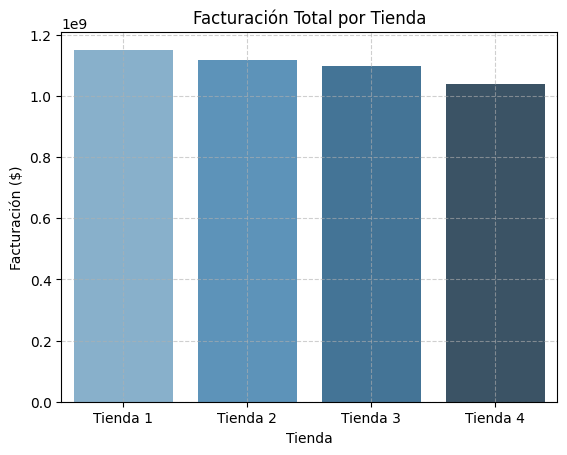

In [ ]:
sns.barplot(
    x='Tienda',
    y='Facturaci√≥n',
    data=df_metricas,
    palette="Blues_d",
    hue='Tienda',        # Asigna la misma variable del eje x
    legend=False         # Evita la advertencia
)
plt.title('Facturaci√≥n Total por Tienda')
plt.ylabel('Facturaci√≥n ($)')
plt.xlabel('Tienda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Gr√°fico 2: Calificaci√≥n Promedio por Tienda (Gr√°fico Circular / Pie Chart)

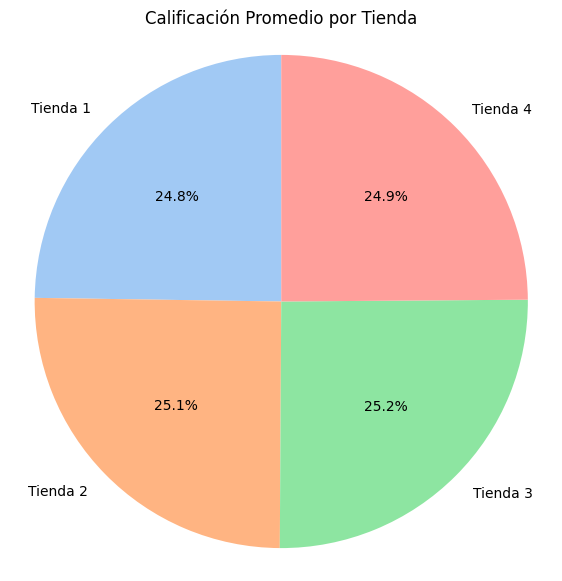

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_metricas['Calificaci√≥n Promedio'], labels=df_metricas['Tienda'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("pastel"))
plt.title('Calificaci√≥n Promedio por Tienda')
plt.axis('equal')  # Para que sea un c√≠rculo perfecto
plt.show()

## Gr√°fico 3: Costo Promedio de Env√≠o por Tienda (Gr√°fico de Barras Horizontales)

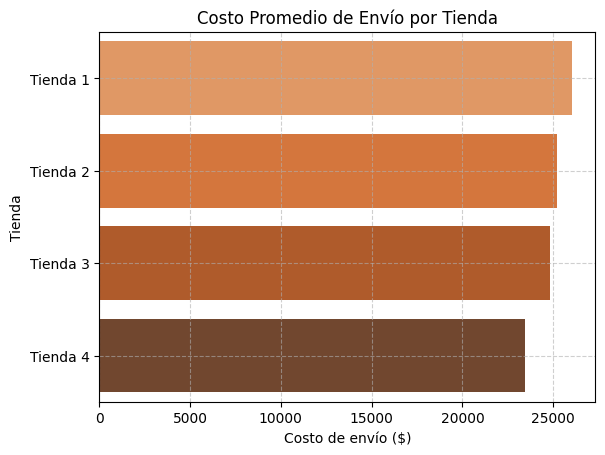

In [ ]:
sns.barplot(
    x='Costo de Env√≠o Promedio',
    y='Tienda',
    data=df_metricas,
    palette="Oranges_d",
    hue='Tienda',        # Asigna la variable del eje y
    legend=False         # Evita la advertencia
)
plt.title('Costo Promedio de Env√≠o por Tienda')
plt.xlabel('Costo de env√≠o ($)')
plt.ylabel('Tienda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Gr√°fico 4: Categor√≠as M√°s Populares (Gr√°fico de Barras)

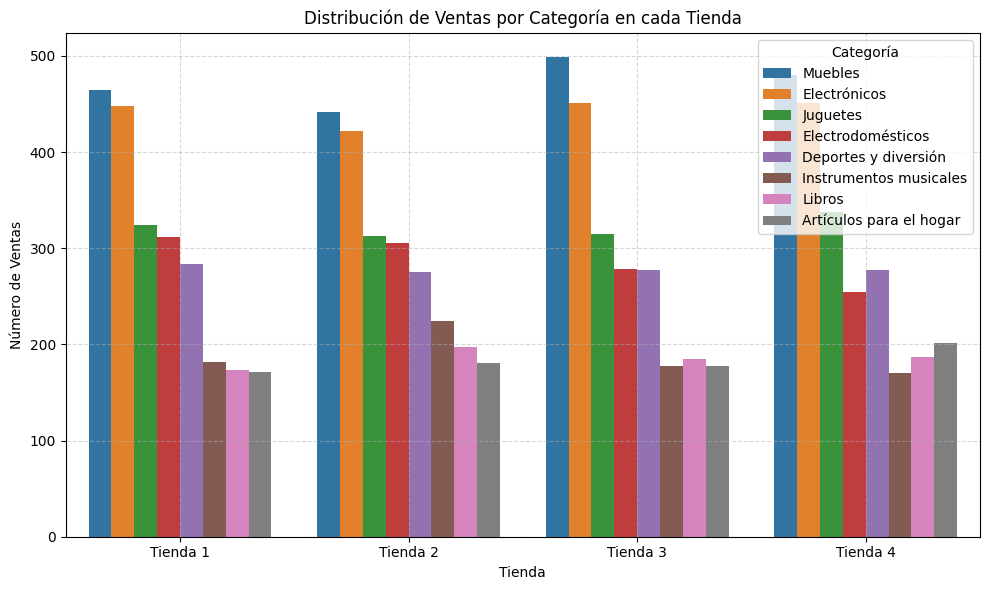

In [ ]:
# Contar categor√≠as por tienda
def contar_categorias(df, nombre_tienda):
    if 'Categor√≠a del Producto' in df.columns:
        return df['Categor√≠a del Producto'].value_counts().reset_index(name='Ventas').assign(Tienda=nombre_tienda)
    else:
        return pd.DataFrame(columns=['Categor√≠a del Producto', 'Ventas', 'Tienda'])

categorias_df = pd.concat([
    contar_categorias(tienda1, 'Tienda 1'),
    contar_categorias(tienda2, 'Tienda 2'),
    contar_categorias(tienda3, 'Tienda 3'),
    contar_categorias(tienda4, 'Tienda 4')
])

# Mostrar gr√°fico de barras apilado
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Ventas', hue='Categor√≠a del Producto', data=categorias_df, errorbar=None)
plt.title('Distribuci√≥n de Ventas por Categor√≠a en cada Tienda')
plt.xlabel('Tienda')
plt.ylabel('N√∫mero de Ventas')
plt.legend(title='Categor√≠a')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Informe Final: Cu√°l Tienda Vender

## üîç Introducci√≥n
  
El objetivo de este an√°lisis es ayudar al Sr. Juan a identificar cu√°l de sus cuatro tiendas presenta un menor rendimiento general, con base en m√∫ltiples factores clave del negocio:

- Ingresos totales por tienda
- Categor√≠as m√°s populares
- Promedio de calificaci√≥n de los clientes
- Productos m√°s y menos vendidos
- Costo promedio del env√≠o

Este an√°lisis se realiz√≥ mediante t√©cnicas de procesamiento de datos y visualizaci√≥n, con el fin de comparar el desempe√±o de cada tienda y brindar una recomendaci√≥n clara y sustentada.

## üìä Desarrollo del An√°lisis

### 1Ô∏è‚É£ Facturaci√≥n Total por Tienda
  
| Tienda   | Facturaci√≥n       |
| -------- | ----------------- |
| Tienda 1 | `$`1,150,880,400.00 |
| Tienda 2 | `$`1,116,343,500.00 |
| Tienda 3 | `$`1,098,019,600.00 |
| Tienda 4 | `$`1,038,375,700.00 |

**An√°lisis:** La **Tienda 4** tiene la **facturaci√≥n m√°s baja**, lo cual indica un volumen de ventas o precios promedio menores en comparaci√≥n con las dem√°s. Aunque la diferencia no es muy grande, s√≠ marca tendencia en conjunto con otros indicadores.

### 2Ô∏è‚É£ Ventas por Categor√≠a

| Tienda   | Categor√≠a Popular | Ventas |
| -------- | ----------------- | ------ |
| Tienda 1 | Muebles           | 465    |
| Tienda 2 | Muebles           | 442    |
| Tienda 3 | Muebles           | 499    |
| Tienda 4 | Muebles           | 480    |

**An√°lisis:** Todas las tiendas tienen como categor√≠a m√°s popular **"Muebles"**, pero la **Tienda 3** lidera ligeramente en cantidad de ventas. Las categor√≠as como **"Electr√≥nicos"** tambi√©n son importantes en todas las tiendas, lo que refleja una demanda sostenida.

### 3Ô∏è‚É£ Calificaci√≥n Promedio de los Clientes  

| Tienda   | Calificaci√≥n Promedio |
| -------- | --------------------- |
| Tienda 1 | 3.98                  |
| Tienda 2 | 4.04                  |
| Tienda 3 | 4.05                  |
| Tienda 4 | 4.00                  |

**An√°lisis:** La **Tienda 1** tiene la **calificaci√≥n m√°s baja**, lo que sugiere que hay oportunidades de mejora en la experiencia del cliente. La **Tienda 3** sigue siendo l√≠der en satisfacci√≥n.  

### 4Ô∏è‚É£ Productos M√°s y Menos Vendidos

| Tienda   | Producto M√°s Vendido      | Ventas | Producto Menos Vendido  | Ventas |
| -------- | ------------------------- | ------ | ----------------------- | ------ |
| Tienda 1 | Microondas                | 60     | Celular ABXY            | 33     |
| Tienda 2 | Iniciando en programaci√≥n | 65     | Juego de mesa           | 32     |
| Tienda 3 | Kit de bancas             | 57     | Bloques de construcci√≥n | 35     |
| Tienda 4 | Cama box                  | 62     | Guitarra el√©ctrica      | 33     |
  
**An√°lisis:** Todos los productos m√°s vendidos tienen buena rotaci√≥n. Sin embargo, en t√©rminos relativos, la **Tienda 2** destaca por tener el producto m√°s vendido con 65 unidades. No hay diferencias significativas entre tiendas en cuanto a productos menos vendidos.

### 5Ô∏è‚É£ Costo Promedio del Env√≠o

| Tienda   | Costo Promedio de Env√≠o     |
| -------- | --------------------------- |
| Tienda 1 | `$`26,018.61                  |
| Tienda 2 | `$`25,216.24                  |
| Tienda 3 | `$`24,805.68                  |
| Tienda 4 | `$`23,459.46                  |

**An√°lisis:** La **Tienda 1** tiene el costo de env√≠o m√°s alto, lo cual puede estar afectando su rentabilidad pese a tener buena facturaci√≥n. Por otro lado, la **Tienda 4** tiene el **menor costo de env√≠o**, lo cual es positivo, pero no compensa su baja facturaci√≥n.

## ‚úÖ Conclusi√≥n

Tras analizar todos los indicadores clave (ingresos, satisfacci√≥n del cliente, costos operativos, categor√≠as y productos vendidos), se puede concluir que:

> ### ‚ùå **La Tienda 4 es la opci√≥n m√°s adecuada para vender.**

### Justificaci√≥n

1. **Menor facturaci√≥n total** : Es la tienda que menos ingresos genera.
2. **Calificaci√≥n promedio intermedia-baja** : Aunque no es la peor, no destaca.
3. **Buen costo de env√≠o** , pero no compensa la baja rentabilidad general.
4. **Productos con buena rotaci√≥n** , pero no suficiente para elevar su rendimiento.

---

## üìå Recomendaci√≥n

‚û°Ô∏è **Vender la Tienda 4** es la estrategia m√°s acorde con los datos presentados. Su baja facturaci√≥n la convierte en la opci√≥n menos rentable.